## 4.9: Intro to Data Visualization with Python- Part 2

### Contents List
#### 01 Importing Visualization Libraries
#### 02 Question 3.  Create a histogram of the “order_hour_of_day” column.
- 2-1 In a markdown cell beneath your histogram, describe what the histogram demonstrates.

#### 03 Question 4. Create a bar chart from the “loyalty_flag” column.
#### 04 Question 5. Check whether there’s a difference in expenditure (“prices”) depending on the hour of the day.
#### 05 Question 6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents
#### 06 Question 7. Explore whether there’s a connection between age and spending power (income)
- 6-1   In a markdown cell beneath your line chart, describe what the line chart shows.

#### 07 Question 8. Export your visualizations as “.png” files in your relevant project folder.
** **

### 01 Importing Visualization Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#set path

path = r"C:\Users\mehrn\OneDrive\Desktop\CareerFoundry Materials\Tasks\Python\10-01-23 Instacart Basket Analysis"

In [3]:
# Import customers dataset

customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_wrangled.pkl'))

In [4]:
# Import the latest version of merged data set 

cx_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cx_ords_prods.pkl'))

In [5]:
cx_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30741973 entries, 0 to 30741972
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int32   
 1   first_name              object  
 2   last_name               object  
 3   gender                  object  
 4   state                   object  
 5   age                     int8    
 6   date_joined             object  
 7   no_of_dependents        int8    
 8   marital_status          object  
 9   income                  int32   
 10  order_id                int32   
 11  order_number            int8    
 12  orders_day_of_week      int8    
 13  order_time_of_day       int8    
 14  days_since_prior_order  float16 
 15  new_customer            bool    
 16  product_id              float16 
 17  add_to_cart_order       float16 
 18  reordered               float16 
 19  product_name            object  
 20  aisle_id                int8    
 21  depart

### 02 Question 3.  Create a histogram of the “order_hour_of_day” column. 

Text(0.5, 0, '24-Hours')

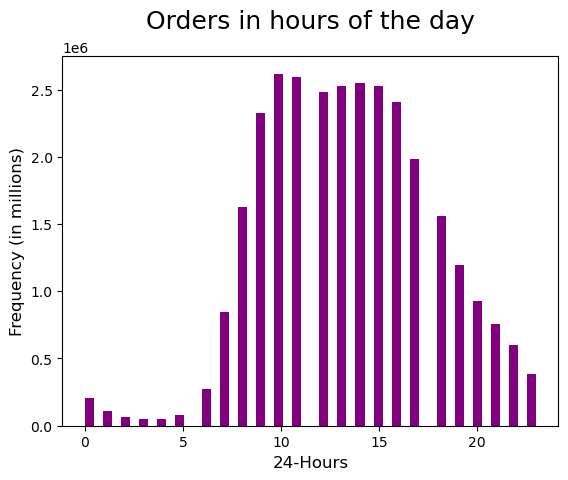

In [5]:
# Create a histogram of 'order_time_of_day' column

hour_hist = cx_ords_prods['order_time_of_day'].plot.hist(bins = 50, color = ['purple'])
plt.title('Orders in hours of the day', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('24-Hours',  fontsize = 12)

### 3-1 In a markdown cell beneath your histogram, describe what the histogram demonstrates.
Description: The total number of orders placed (in millions) over each hour of a day (24-hour format)

In [7]:
#checking the histogram accuracy

cx_ords_prods['order_time_of_day'].value_counts(dropna=False).sort_index()

0      208462
1      109842
2       65722
3       48752
4       50719
5       83304
6      275060
7      846172
8     1628851
9     2326363
10    2617465
11    2589389
12    2480841
13    2522821
14    2550171
15    2527483
16    2408377
17    1983359
18    1556452
19    1197035
20     926625
21     754995
22     601616
23     382097
Name: order_time_of_day, dtype: int64

In [8]:
# Descriptive Statistics on 'order_time_of_day' column

cx_ords_prods['order_time_of_day'].describe()

count    3.074197e+07
mean     1.342822e+01
std      4.247772e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_time_of_day, dtype: float64

### 04 Question 4. Create a bar chart from the “loyalty_flag” column.

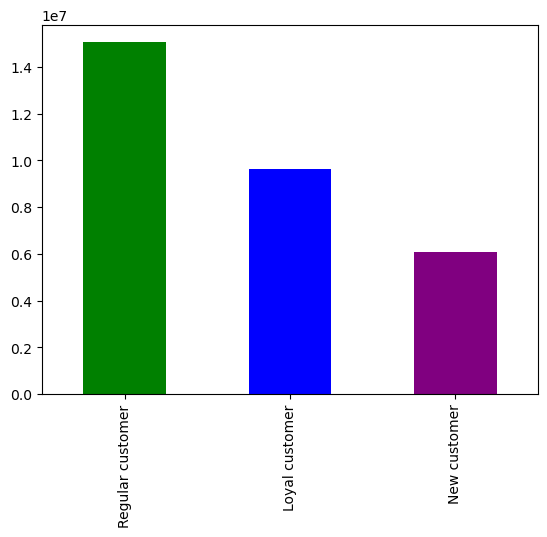

In [9]:
bar_loyalty = cx_ords_prods['loyalty_flag'].value_counts().plot.bar(color = ['green', 'blue', 'purple'])

#### Result: Most customers are regular customers at Instacart. 

In [10]:
# the exact number of values for the barchart plotted above

cx_ords_prods['loyalty_flag'].value_counts()

Regular customer    15060439
Loyal customer       9615961
New customer         6065573
Name: loyalty_flag, dtype: int64

### 05 Question 5. Check whether there’s a difference in expenditure (“prices”) depending on the hour of the day. 

In [11]:
# Sampling the data.70 percent of the rows should logically be sorted into big and 30 percent of the rows
#should logically be sorted into small.

np.random.seed(2)

In [12]:
dev = np.random.rand(len(cx_ords_prods)) <0.7

In [13]:
big = cx_ords_prods[dev]

In [14]:
small = cx_ords_prods[~dev]

In [15]:
# Filtering data with two required columns to plot the linechart

df = small[['prices', 'order_time_of_day']]

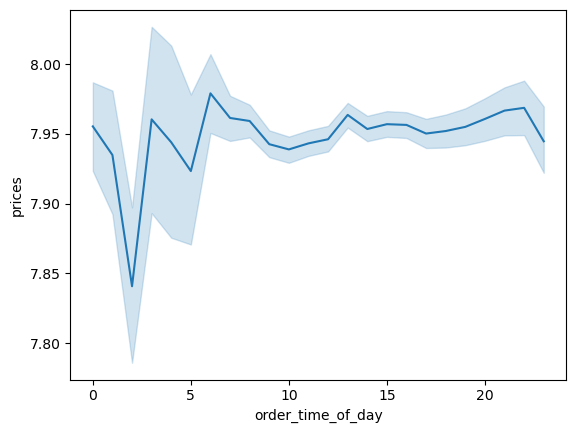

In [16]:
# Creating the line chart on the sample data

line_expenditure = sns.lineplot(data = df, x= 'order_time_of_day', y = 'prices')

#### Result: Customers seem to spend more money between 6-9 am, while less orders have been placed surprisingly in that period day.  
According to the 'hour_hist' histogram and 'line_expenditure' linechart above, a high frequency of orders with a low expenditure are placed during the day (9am-5pm). However, a low frequency of orders with a high expenditure happens between 12-7am.

### 06 Question 6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [11]:
# Checking martital_status column's values

customers['no_of_dependents'].value_counts()

0    51602
3    51594
1    51531
2    51482
Name: no_of_dependents, dtype: int64

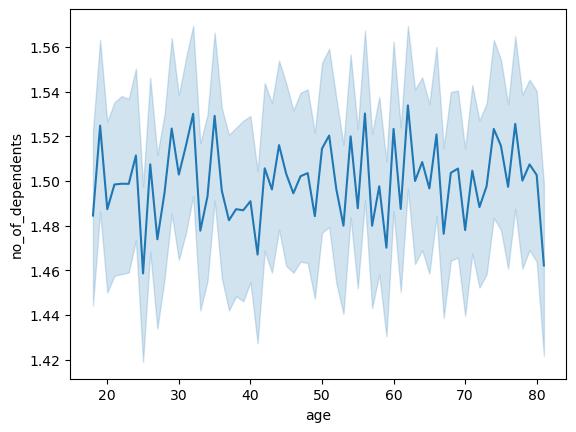

In [18]:
# Draw a linechart

line_age = sns.lineplot(data = customers, x= 'age', y = 'no_of_dependents')

###  6-1   In a markdown cell beneath your line chart, describe what the line chart shows.
The line chart shows the relationship between customer's age and the number of dependents in a family (0-3). there is no clear connection between age and number of dependents for Instacart customerssome customers.

### 07 Question 7. Explore whether there’s a connection between age and spending power (income)

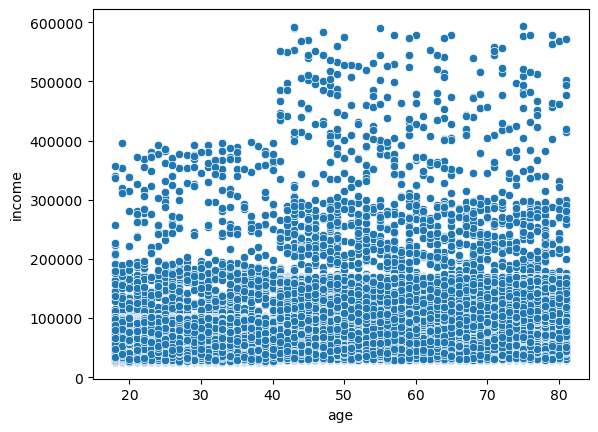

In [19]:
# Draw a scatterplot

scatterplot_income = sns.scatterplot( data= customers, x= 'age', y= 'income')

### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

From scatterplot, showing the relationship of age and income, it is observed that all the customers make an income over 20K USD per year. Also, a small proportion of customers aged 40 and more are earning over 40k USD (up to 60k) annually so they have more spending power.

### 08 Question 8. Export your visualizations as “.png” files in your relevant project folder.

In [20]:
# Exporting the plotted charts

scatterplot_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_income.png'), bbox_inches='tight')

In [21]:
line_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age.png'), bbox_inches='tight')

In [22]:
line_expenditure.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_expenditure.png'), bbox_inches='tight')

In [23]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'), bbox_inches='tight')

In [6]:
hour_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hour_hist.png'), bbox_inches='tight')